In [59]:
import pandas as pd
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [60]:
df = pd.read_csv('car data.csv')

In [61]:
df.head()

Car_Name  Year  Selling_Price  Present_Price  Kms_Driven Fuel_Type  \
0     ritz  2014           3.35           5.59       27000    Petrol   
1      sx4  2013           4.75           9.54       43000    Diesel   
2     ciaz  2017           7.25           9.85        6900    Petrol   
3  wagon r  2011           2.85           4.15        5200    Petrol   
4    swift  2014           4.60           6.87       42450    Diesel   

  Seller_Type Transmission  Owner  
0      Dealer       Manual      0  
1      Dealer       Manual      0  
2      Dealer       Manual      0  
3      Dealer       Manual      0  
4      Dealer       Manual      0

In [62]:
df.shape

(301, 9)

In [63]:
print(df['Seller_Type'].unique())
print(df['Owner'].unique())
print(df['Transmission'].unique())
print(df['Fuel_Type'].unique())

['Dealer' 'Individual']
[0 1 3]
['Manual' 'Automatic']
['Petrol' 'Diesel' 'CNG']


In [64]:
df.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [65]:
df.describe()

Year  Selling_Price  Present_Price     Kms_Driven       Owner
count   301.000000     301.000000     301.000000     301.000000  301.000000
mean   2013.627907       4.661296       7.628472   36947.205980    0.043189
std       2.891554       5.082812       8.644115   38886.883882    0.247915
min    2003.000000       0.100000       0.320000     500.000000    0.000000
25%    2012.000000       0.900000       1.200000   15000.000000    0.000000
50%    2014.000000       3.600000       6.400000   32000.000000    0.000000
75%    2016.000000       6.000000       9.900000   48767.000000    0.000000
max    2018.000000      35.000000      92.600000  500000.000000    3.000000

In [66]:
df.columns

Index(['Car_Name', 'Year', 'Selling_Price', 'Present_Price', 'Kms_Driven',
       'Fuel_Type', 'Seller_Type', 'Transmission', 'Owner'],
      dtype='object')

In [67]:
final_dataset=df[['Year', 'Selling_Price', 'Present_Price', 'Kms_Driven',
       'Fuel_Type', 'Seller_Type', 'Transmission', 'Owner']]

In [68]:
final_dataset.head()

Year  Selling_Price  Present_Price  Kms_Driven Fuel_Type Seller_Type  \
0  2014           3.35           5.59       27000    Petrol      Dealer   
1  2013           4.75           9.54       43000    Diesel      Dealer   
2  2017           7.25           9.85        6900    Petrol      Dealer   
3  2011           2.85           4.15        5200    Petrol      Dealer   
4  2014           4.60           6.87       42450    Diesel      Dealer   

  Transmission  Owner  
0       Manual      0  
1       Manual      0  
2       Manual      0  
3       Manual      0  
4       Manual      0

In [69]:
final_dataset['Current_Year']=2023

In [70]:
final_dataset['number_of_years']=final_dataset['Current_Year']-final_dataset['Year']

In [71]:
final_dataset.head()

Year  Selling_Price  Present_Price  Kms_Driven Fuel_Type Seller_Type  \
0  2014           3.35           5.59       27000    Petrol      Dealer   
1  2013           4.75           9.54       43000    Diesel      Dealer   
2  2017           7.25           9.85        6900    Petrol      Dealer   
3  2011           2.85           4.15        5200    Petrol      Dealer   
4  2014           4.60           6.87       42450    Diesel      Dealer   

  Transmission  Owner  Current_Year  number_of_years  
0       Manual      0          2023                9  
1       Manual      0          2023               10  
2       Manual      0          2023                6  
3       Manual      0          2023               12  
4       Manual      0          2023                9

In [72]:
final_dataset.drop(['Year'],axis=1,inplace=True)
final_dataset.drop(['Current_Year'],axis=1,inplace=True)

In [73]:
final_dataset.head()

Selling_Price  Present_Price  Kms_Driven Fuel_Type Seller_Type  \
0           3.35           5.59       27000    Petrol      Dealer   
1           4.75           9.54       43000    Diesel      Dealer   
2           7.25           9.85        6900    Petrol      Dealer   
3           2.85           4.15        5200    Petrol      Dealer   
4           4.60           6.87       42450    Diesel      Dealer   

  Transmission  Owner  number_of_years  
0       Manual      0                9  
1       Manual      0               10  
2       Manual      0                6  
3       Manual      0               12  
4       Manual      0                9

In [74]:
final_dataset=pd.get_dummies(final_dataset,drop_first=True)

In [75]:
final_dataset.head()

Selling_Price  Present_Price  Kms_Driven  Owner  number_of_years  \
0           3.35           5.59       27000      0                9   
1           4.75           9.54       43000      0               10   
2           7.25           9.85        6900      0                6   
3           2.85           4.15        5200      0               12   
4           4.60           6.87       42450      0                9   

   Fuel_Type_Diesel  Fuel_Type_Petrol  Seller_Type_Individual  \
0                 0                 1                       0   
1                 1                 0                       0   
2                 0                 1                       0   
3                 0                 1                       0   
4                 1                 0                       0   

   Transmission_Manual  
0                    1  
1                    1  
2                    1  
3                    1  
4                    1

In [76]:
final_dataset.corr()

Selling_Price  Present_Price  Kms_Driven     Owner  \
Selling_Price                1.000000       0.878983    0.029187 -0.088344   
Present_Price                0.878983       1.000000    0.203647  0.008057   
Kms_Driven                   0.029187       0.203647    1.000000  0.089216   
Owner                       -0.088344       0.008057    0.089216  1.000000   
number_of_years             -0.236141       0.047584    0.524342  0.182104   
Fuel_Type_Diesel             0.552339       0.473306    0.172515 -0.053469   
Fuel_Type_Petrol            -0.540571      -0.465244   -0.172874  0.055687   
Seller_Type_Individual      -0.550724      -0.512030   -0.101419  0.124269   
Transmission_Manual         -0.367128      -0.348715   -0.162510 -0.050316   

                        number_of_years  Fuel_Type_Diesel  Fuel_Type_Petrol  \
Selling_Price                 -0.236141          0.552339         -0.540571   
Present_Price                  0.047584          0.473306         -0.465244   
Kms_Driven                     0.524342          0.172515         -0.172874   
Owner                          0.182104         -0.053469          0.055687   
number_of_years                1.000000         -0.064315          0.059959   
Fuel_Type_Diesel              -0.064315          1.000000         -0.979648   
Fuel_Type_Petrol               0.059959         -0.979648          1.000000   
Seller_Type_Individual         0.039896         -0.350467          0.358321   
Transmission_Manual           -0.000394         -0.098643          0.091013   

                        Seller_Type_Individual  Transmission_Manual  
Selling_Price                        -0.550724            -0.367128  
Present_Price                        -0.512030            -0.348715  
Kms_Driven                           -0.101419            -0.162510  
Owner                                 0.124269            -0.050316  
number_of_years                       0.039896            -0.000394  
Fuel_Type_Diesel                     -0.350467            -0.098643  
Fuel_Type_Petrol                      0.358321             0.091013  
Seller_Type_Individual                1.000000             0.063240  
Transmission_Manual                   0.063240             1.000000

In [77]:
import seaborn as sns

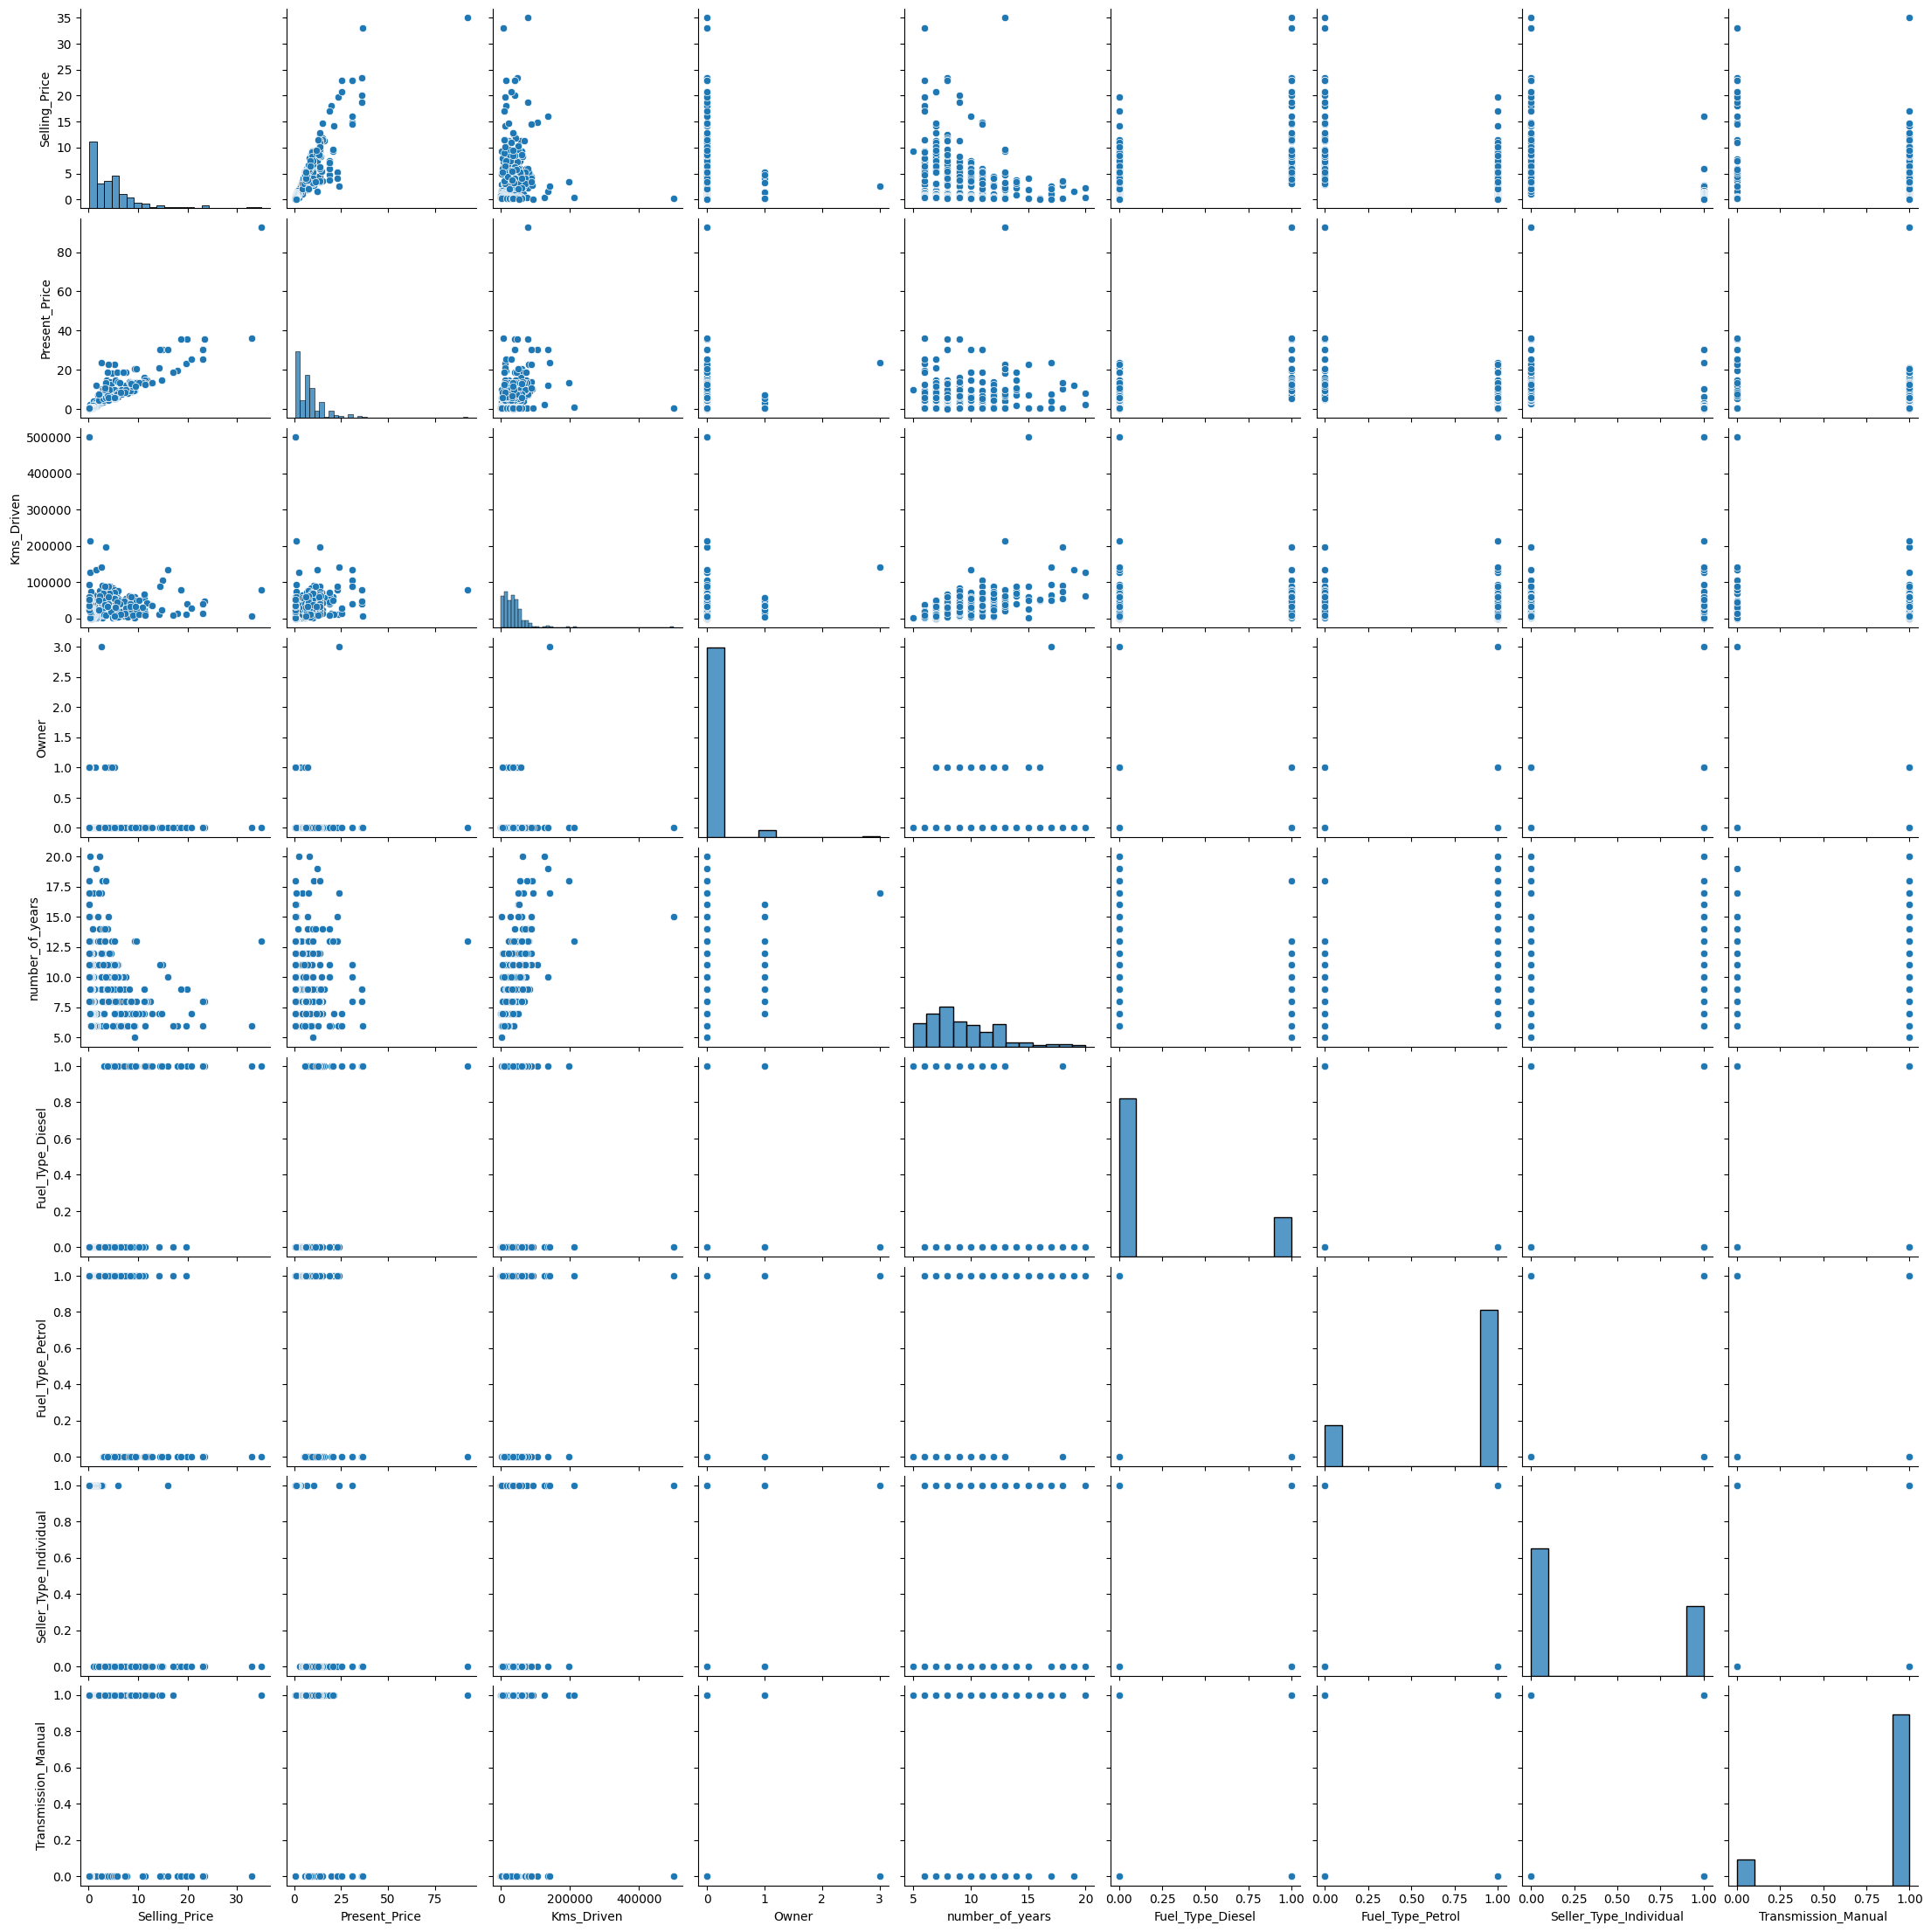

In [78]:
sns.pairplot(final_dataset)

In [79]:
import matplotlib.pyplot as plt
%matplotlib inline

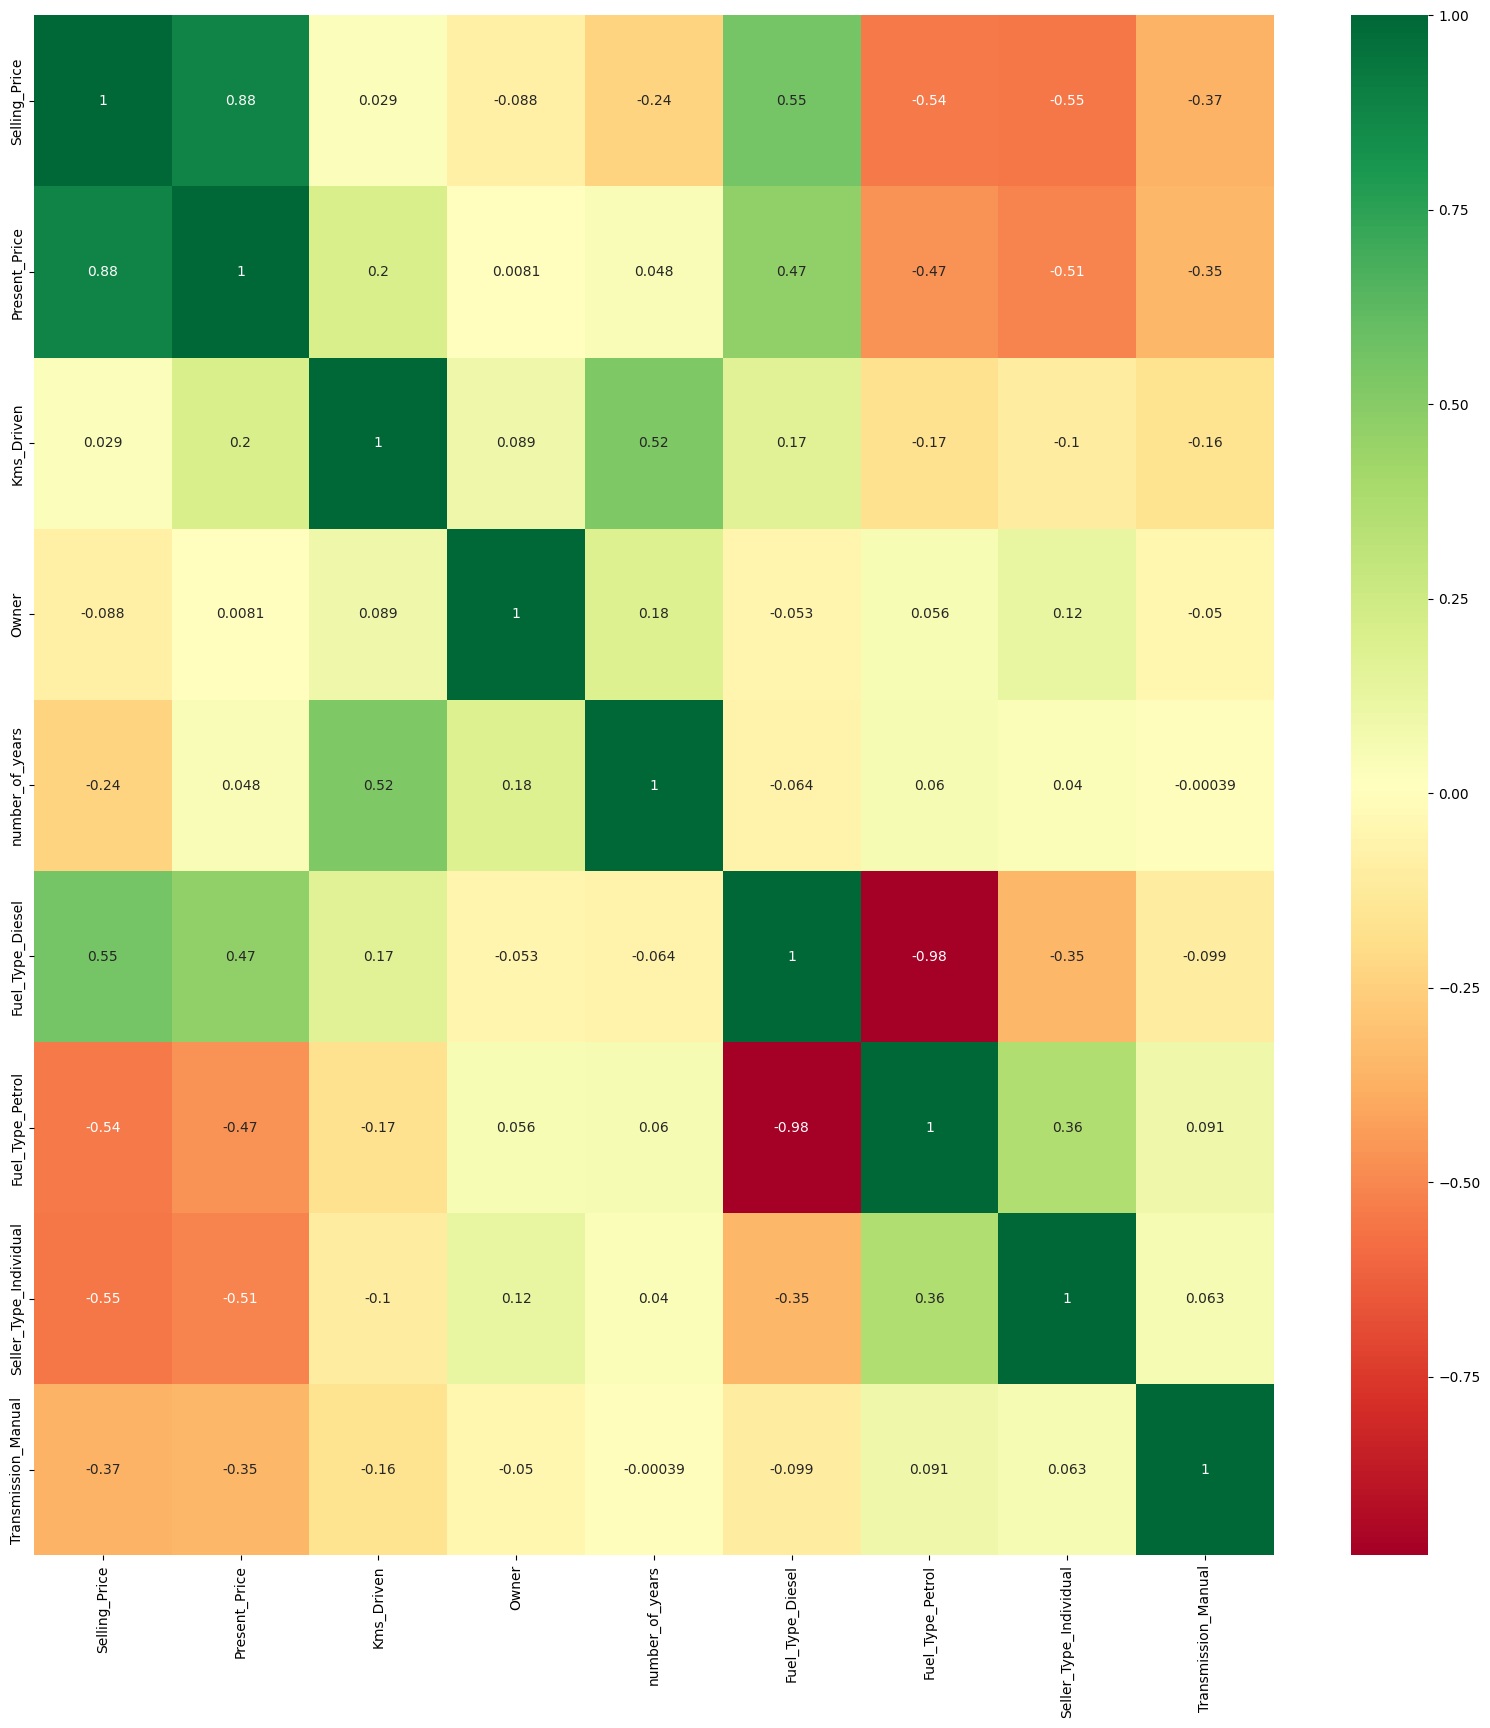

In [80]:
corrmat=final_dataset.corr()
top_corr_features=corrmat.index
plt.figure(figsize=(20,20))
#plot heat map
g=sns.heatmap(final_dataset[top_corr_features].corr(),annot=True,cmap="RdYlGn")

In [81]:
x=final_dataset.iloc[:,1:]
y=final_dataset.iloc[:,0]

In [82]:
x.head()

Present_Price  Kms_Driven  Owner  number_of_years  Fuel_Type_Diesel  \
0           5.59       27000      0                9                 0   
1           9.54       43000      0               10                 1   
2           9.85        6900      0                6                 0   
3           4.15        5200      0               12                 0   
4           6.87       42450      0                9                 1   

   Fuel_Type_Petrol  Seller_Type_Individual  Transmission_Manual  
0                 1                       0                    1  
1                 0                       0                    1  
2                 1                       0                    1  
3                 1                       0                    1  
4                 0                       0                    1

In [83]:
y.head()

0    3.35
1    4.75
2    7.25
3    2.85
4    4.60
Name: Selling_Price, dtype: float64

In [84]:
##Feature Importance
from sklearn.ensemble import ExtraTreesRegressor
model=ExtraTreesRegressor()
model.fit(x,y)

ExtraTreesRegressor()

In [85]:
print(model.feature_importances_)

[0.40147252 0.03642134 0.00132631 0.07936259 0.20828636 0.00997102
 0.12995393 0.13320593]


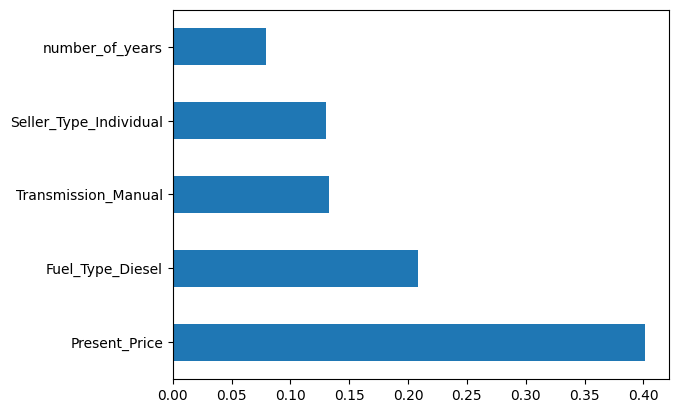

In [86]:
##plot graph of feature importances
feat_importances = pd.Series(model.feature_importances_, index=x.columns)
feat_importances.nlargest(5).plot(kind='barh')
plt.show()

In [87]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [88]:
x_train.shape

(240, 8)

In [89]:
from sklearn.ensemble import RandomForestRegressor
rf_random=RandomForestRegressor()

In [90]:
import numpy as np
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(5, 30, num = 6)]
# max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10, 15, 100]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 5, 10]

In [91]:
from sklearn.model_selection import RandomizedSearchCV

In [92]:
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

print(random_grid)

{'n_estimators': [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200], 'max_features': ['auto', 'sqrt'], 'max_depth': [5, 10, 15, 20, 25, 30], 'min_samples_split': [2, 5, 10, 15, 100], 'min_samples_leaf': [1, 2, 5, 10]}


In [93]:
rf = RandomForestRegressor()

In [94]:
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid,scoring='neg_mean_squared_error', n_iter = 10, cv = 5, verbose=2, random_state=42, n_jobs = 1)

In [95]:
rf_random.fit(x_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   0.5s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   0.5s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   0.5s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   0.5s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   0.5s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1100; total time=   0.7s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1100; total time=   0.7s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimator

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=1,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100,
                                                         1200]},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=2)

In [96]:
predictions=rf_random.predict(x_test)

In [97]:
predictions

array([ 1.17704194,  0.2316411 ,  5.19768814,  0.44745517, 12.32388623,
        5.80231506,  4.07388556,  0.63710184,  2.91722522,  0.45177598,
        6.37424286,  1.17658523,  2.5269071 ,  5.3031136 ,  0.46762857,
        4.85705939,  1.17658523,  5.30433292, 11.8464333 ,  0.60367293,
        5.46466643,  0.65171158,  0.42584012,  0.36351948,  4.99655411,
        7.50584147,  1.28145281,  0.23518019,  7.02244421,  0.39936514,
       10.14107042,  1.17704194,  2.53055048,  6.65102765, 12.10850198,
        0.27298416,  6.35073966,  4.57385709, 10.21923403,  0.27884797,
        1.17704194, 10.24059892,  4.26290425,  4.02533069,  0.72457348,
        1.18888407,  3.62064344,  1.17658523,  1.79233181,  6.79063582,
        7.48043334,  5.06235157,  2.94491808,  1.18886505,  2.43662833,
        3.79545361,  0.42525143,  4.53530343,  9.31243314,  0.39922328,
        0.64568716])

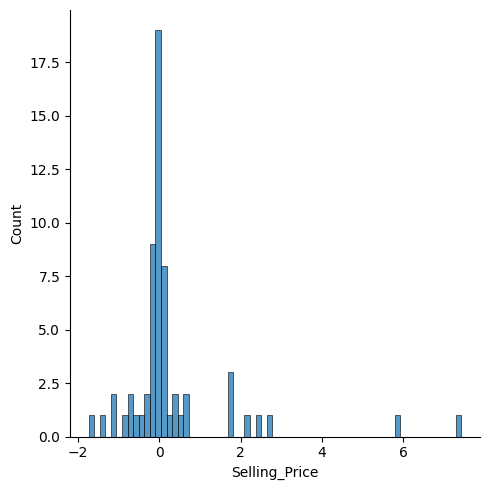

In [98]:
sns.displot(y_test-predictions)

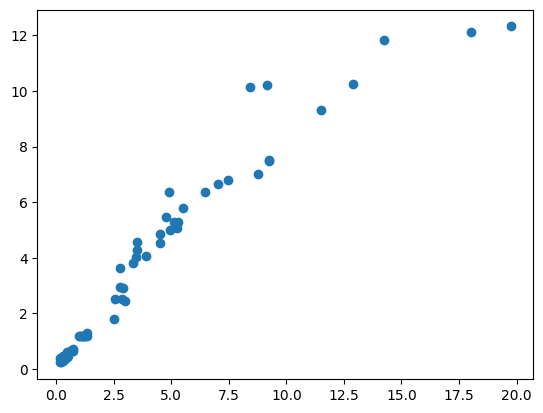

In [99]:
plt.scatter(y_test,predictions)

In [100]:
import pickle
# open a file, where you ant to store the data
file = open('random_forest_regression_model.pkl', 'wb')

# dump information to that file
pickle.dump(rf_random, file)